# Zomato Dataset – Exploratory Data Analysis (EDA)

**Internship:** Alfido Tech Data Science Internship  
**Task:** Zomato Dataset Analysis  
**Goal:** Understand the dataset and find useful insights using EDA.


1. Title & Objective (Markdown)
2. Import Libraries (Code)
3. Load Dataset (Code)
4. Dataset Overview (Markdown + Code)
5. Missing Values Analysis (Code + Markdown)
6. Data Cleaning (Code + Markdown)
7. EDA Questions (Markdown)
8. Visualizations (Code + Markdown)
9. Insights & Conclusion (Markdown)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data "zomato.csv"

In [2]:
df= pd.read_csv("zomato.csv")

## Reading the first 5 rows and doing other info related to the task

In [3]:
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


## getting the info

In [4]:
df.shape

(56252, 13)

In [5]:
#df.info

In [6]:
df.columns


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

## Dataset Columns Overview (Updated)

Each row represents a restaurant listed on Zomato.
Below are the columns present in this dataset and their meaning.


| Column Name | Meaning (Simple Explanation) |
|------------|-----------------------------|
| address | Full address of the restaurant |
| name | Name of the restaurant |
| online_order | Whether online food ordering is available (Yes / No) |
| book_table | Whether table booking is available (Yes / No) |
| rate | Restaurant rating (example: 4.1/5) |
| votes | Number of users who rated the restaurant |
| phone | Contact number of the restaurant |
| location | Area or locality where the restaurant is located |
| rest_type | Type of restaurant (Cafe, Quick Bites, Casual Dining, etc.) |
| dish_liked | Popular dishes liked by customers |
| cuisines | Types of cuisines served by the restaurant |
| approx_cost(for two people) | Approximate cost for two people |
| listed_in(type) | Category in which the restaurant is listed on Zomato |


## Missing Values in the Dataset

Missing values occur when some information about a restaurant is not available.
In this step, we identify which columns contain missing data.


In [7]:
df.isnull().sum().sort_values(ascending=False)

dish_liked                     28225
rate                            7838
listed_in(type)                 4610
phone                           1296
approx_cost(for two people)      521
rest_type                        338
cuisines                         203
location                         126
votes                             78
book_table                        58
online_order                      19
address                           17
name                              16
dtype: int64

### Observations from Missing Values

- Columns like **dish_liked** contain many missing values.
- Some restaurants do not have ratings.
- Approximate cost for two people is missing for some entries.
- Contact information may not be available for all restaurants.



In [8]:
df.dtypes

address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                          object
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
listed_in(type)                object
dtype: object

In [9]:
df.head(2)


,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet


## Step 5: Data Cleaning

In this step, we clean important columns so they can be used for analysis.
Some columns are stored as text but should be numbers.


## Cleaning Ratings & Cleaning Cost
### Rating Column Cleaning

The `rate` column contained mixed values such as valid ratings (e.g. "4.1/5") 
and non-numeric entries like "NEW" or "-".

To ensure accurate analysis:
- Only rows containing valid ratings were retained
- The "/5" suffix was removed
- The column was converted to numeric format

Invalid or non-convertible values were safely coerced to NaN to prevent errors 
during analysis.

In [10]:
df["rate"].head(10)

0          4.1/5
1          4.1/5
2          3.8/5
3          3.7/5
4          3.8/5
5          3.8/5
6          3.6/5
7          4.6/5
8          4.0/5
9    \nTop floor
Name: rate, dtype: object

In [11]:
# keeping the data we need
df["rate"]=df["rate"].apply(lambda x: x if isinstance(x,str) and "/5" in x else np.nan) 
df["rate"]=df["rate"].str.replace("/5","")
df["rate"]=pd.to_numeric(df["rate"],errors="coerce")


In [12]:
#cleaning the cost
df.rename(columns={"approx_cost(for two people)":"cost"},inplace=True)
df["cost"].head(10)

0                                                  800
1                                                  800
2                                                  800
3                                                  300
4                                                  600
5                                                  600
6                                                  800
7                                                  600
8                                                  700
9     it turned out worse than the garlic bread. Th...
Name: cost, dtype: object

In [13]:
df["cost"]=df["cost"].str.replace(",","")
df["cost"]=pd.to_numeric(df["cost"],errors="coerce")

In [14]:
df[["rate","cost"]].head(10)

,rate,cost
0,4.1,800.0
1,4.1,800.0
2,3.8,800.0
3,3.7,300.0
4,3.8,600.0
5,3.8,600.0
6,3.6,800.0
7,4.6,600.0
8,4.0,700.0
9,NaN,NaN


# EDA
### Cleaning the `online_order` Column

The `online_order` column should contain only "Yes" or "No".
However, some rows contain invalid text due to data issues.
We will keep only valid values and treat others as missing.


In [15]:
df["online_order"]= df["online_order"].apply(lambda x: x.strip().capitalize() if isinstance (x,str) and x.lower() in ['yes','no'] else np.nan)

In [16]:
df["online_order"].value_counts()

online_order
Yes    30444
No     21273
Name: count, dtype: int64

## Online Order Availability

This plot shows how many restaurants provide online ordering.


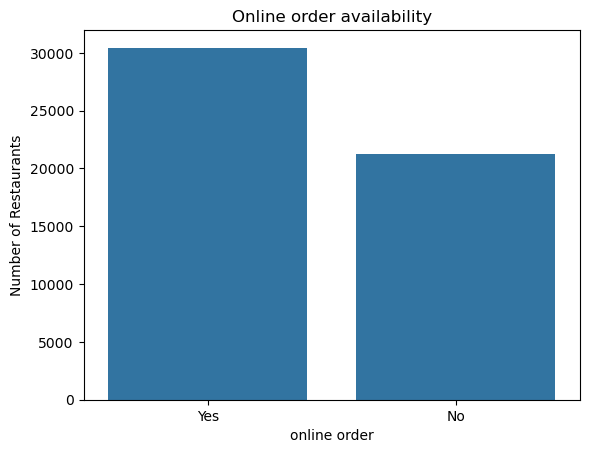

In [25]:
sns.countplot(x="online_order",data=df)
plt.title("Online order availability")
plt.xlabel("online order")
plt.ylabel("Number of Restaurants")
plt.show()

**Insight:**  
Most restaurants in the dataset provide online ordering, showing that online food delivery is widely adopted.


In [17]:
df["book_table"]= df["book_table"].apply(lambda x: x.strip().capitalize() if isinstance (x,str) and x.lower() in ['yes','no'] else np.nan)

In [18]:
df["book_table"].value_counts()

book_table
No     45268
Yes     6449
Name: count, dtype: int64

# What are the most common restaurant types?
### Cleaning the `rest_type` Column

The `rest_type` column should contain restaurant categories such as
"Quick Bites", "Cafe", or "Casual Dining".

However, due to data issues, some rows contain review text.
We will keep only reasonable category values and treat others as missing.


In [19]:
valid_rest_type=df["rest_type"].value_counts()
valid_rest_type=valid_rest_type[valid_rest_type>100].index
df["rest_type"]=df["rest_type"].where(df["rest_type"].isin(valid_rest_type))

In [20]:
df["rest_type"].value_counts()

rest_type
Quick Bites                    19132
Casual Dining                  10330
Cafe                            3732
Delivery                        2607
Dessert Parlor                  2263
Takeaway, Delivery              2037
Casual Dining, Bar              1154
Bakery                          1141
Beverage Shop                    867
Bar                              697
Food Court                       624
Sweet Shop                       468
Bar, Casual Dining               425
Lounge                           396
 ('Rated 4.0'                    394
Pub                              357
Fine Dining                      346
 ('Rated 5.0'                    334
Casual Dining, Cafe              319
Beverage Shop, Quick Bites       298
Bakery, Quick Bites              289
Mess                             267
Pub, Casual Dining               255
Sweet Shop, Quick Bites          178
Kiosk                            176
Dessert Parlor, Cafe             175
Cafe, Casual Dining         

# What cuisines are most popular?

In [21]:
valid_rest_type2=df["cuisines"].value_counts()
valid_rest_type2=valid_rest_type2[valid_rest_type2>100].index
df["cuisines"]=df["cuisines"].where(df["cuisines"].isin(valid_rest_type2))

In [22]:
df['cuisines'].value_counts().head(10)


cuisines
North Indian                           2913
North Indian, Chinese                  2385
South Indian                           1828
Biryani                                 918
Bakery, Desserts                        911
Fast Food                               803
Desserts                                766
Cafe                                    756
South Indian, North Indian, Chinese     726
Bakery                                  651
Name: count, dtype: int64

# Which locations have the most restaurants?

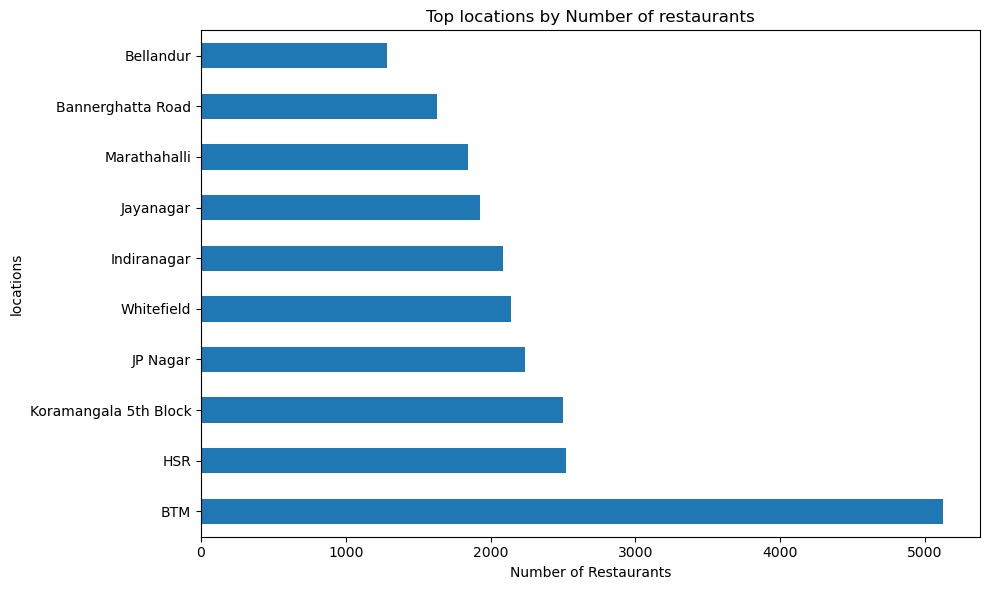

In [29]:
plt.figure(figsize=(10,6))
df['location'].value_counts().head(10).plot(kind="barh")
plt.title("Top locations by Number of restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("locations")
plt.tight_layout()
plt.show()

**Insight:**  
Certain locations have a much higher concentration of restaurants, indicating popular food hubs.


# Online order availability by location

In [24]:
df.groupby("location")["online_order"].value_counts().unstack()

online_order,No,Yes
location,,
BTM,1792.0,3332.0
Banashankari,397.0,509.0
Banaswadi,321.0,343.0
Bannerghatta Road,706.0,924.0
Basavanagudi,243.0,441.0
...,...,...
West Bangalore,4.0,2.0
Whitefield,1005.0,1139.0
Wilson Garden,112.0,134.0


## Distribution of Restaurant Ratings


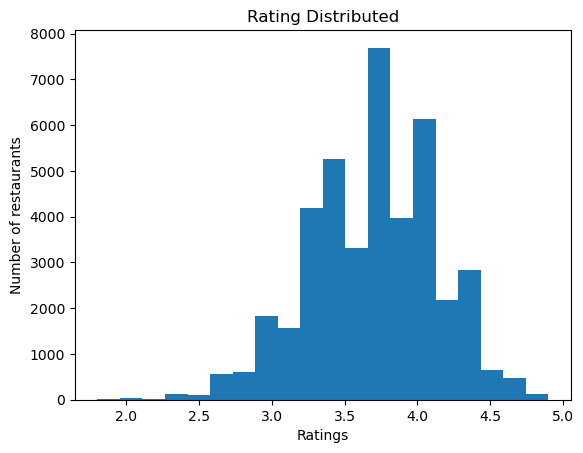

In [33]:
plt.hist(df["rate"].dropna(),bins=20)
plt.xlabel("Ratings")
plt.ylabel("Number of restaurants")
plt.title("Rating Distributed")
plt.show()

**Insight:**  
Most restaurants have ratings between 3.5 and 4.5, indicating generally positive customer feedback.


## Most Common Restaurant Types


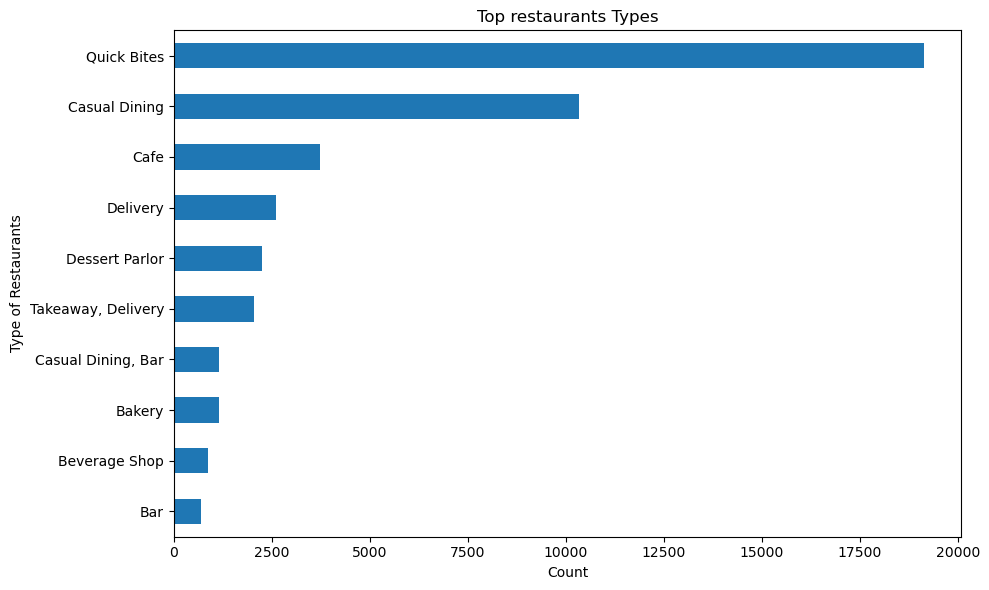

In [36]:
plt.figure(figsize=(10,6))
top_res=df['rest_type'].value_counts().head(10)
top_res.sort_values().plot(kind="barh")
plt.title("Top restaurants Types")
plt.xlabel("Count")
plt.ylabel("Type of Restaurants")
plt.tight_layout()
plt.show()

**Insight:**  
Quick Bites and Casual Dining restaurants are the most common types in the dataset.


## Relationship Between Ratings and Votes


In [42]:
df["votes"]=pd.to_numeric(df["votes"],errors="coerce")

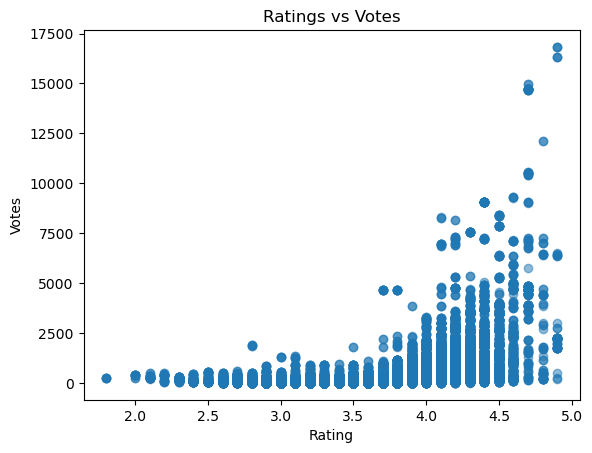

In [43]:
plt.scatter(df["rate"],df["votes"],alpha=0.5)
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.title("Ratings vs Votes")
plt.show()

**Insight:**  
Restaurants with higher ratings generally receive more votes, indicating greater popularity.


## Key Insights from EDA

- Most restaurants in the dataset offer online ordering, showing strong adoption of food delivery services.
- Quick Bites and Casual Dining are the most common restaurant types.
- Restaurant ratings are mostly between 3.5 and 4.5, indicating generally positive customer feedback.
- Certain locations have a much higher concentration of restaurants, making them major food hubs.
- Restaurants with higher ratings tend to receive more votes, indicating higher popularity.
